In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
import numpy as np
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm, tree
import xgboost as xgb
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('/Users/armitasafavi/Downloads/UCI_Credit_Card 2.csv')

In [3]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


ID: ID of each client
LIMIT_BAL: Amount of given credit in NT dollars (includes individual and family/supplementary credit
SEX: Gender (1=male, 2=female)
EDUCATION: (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)
MARRIAGE: Marital status (1=married, 2=single, 3=others)
AGE: Age in years
PAY_0: Repayment status in September, 2005 (-1=pay duly, 1=payment delay for one month, 2=payment delay for two months, ... 8=payment delay for eight months, 9=payment delay for nine months and above)
PAY_2: Repayment status in August, 2005 (scale same as above)
PAY_3: Repayment status in July, 2005 (scale same as above)
PAY_4: Repayment status in June, 2005 (scale same as above)
PAY_5: Repayment status in May, 2005 (scale same as above)
PAY_6: Repayment status in April, 2005 (scale same as above)
BILL_AMT1: Amount of bill statement in September, 2005 (NT dollar)
BILL_AMT2: Amount of bill statement in August, 2005 (NT dollar)
BILL_AMT3: Amount of bill statement in July, 2005 (NT dollar)
BILL_AMT4: Amount of bill statement in June, 2005 (NT dollar)
BILL_AMT5: Amount of bill statement in May, 2005 (NT dollar)
BILL_AMT6: Amount of bill statement in April, 2005 (NT dollar)
PAY_AMT1: Amount of previous payment in September, 2005 (NT dollar)
PAY_AMT2: Amount of previous payment in August, 2005 (NT dollar)
PAY_AMT3: Amount of previous payment in July, 2005 (NT dollar)
PAY_AMT4: Amount of previous payment in June, 2005 (NT dollar)
PAY_AMT5: Amount of previous payment in May, 2005 (NT dollar)
PAY_AMT6: Amount of previous payment in April, 2005 (NT dollar)
default.payment.next.month: Default payment (1=yes, 0=no)

In [4]:
df.shape

(30000, 25)

Looking for missing values

In [5]:
#Looking for missing values
df.isnull().sum().sum()

0

In [7]:
df.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [8]:
default=df.copy()

In [11]:
#creating better indicators of credit card default, by specifying carrying balance
default['carrying_balance1'] = default['BILL_AMT1'] - default['PAY_AMT1']
default['carrying_balance2'] = default['BILL_AMT2'] - default['PAY_AMT2']
default['carrying_balance3'] = default['BILL_AMT3'] - default['PAY_AMT3']
default['carrying_balance4'] = default['BILL_AMT4'] - default['PAY_AMT4']
default['carrying_balance5'] = default['BILL_AMT5'] - default['PAY_AMT5']
default['carrying_balance6'] = default['BILL_AMT6'] - default['PAY_AMT6']

In [13]:
#creating better indicators of credit card default, by specifying debt to credit ratio
default['debt_credit_ratio1'] = default['carrying_balance1']/ default['LIMIT_BAL']
default['debt_credit_ratio2'] = default['carrying_balance2']/ default['LIMIT_BAL']
default['debt_credit_ratio3'] = default['carrying_balance3']/ default['LIMIT_BAL']
default['debt_credit_ratio4'] = default['carrying_balance4']/ default['LIMIT_BAL']
default['debt_credit_ratio5'] = default['carrying_balance5']/ default['LIMIT_BAL']
default['debt_credit_ratio6'] = default['carrying_balance6']/ default['LIMIT_BAL']

In [28]:
#fropping columns that are no longer needed
default=default.drop(['BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5',
              'BILL_AMT6','PAY_AMT1','PAY_AMT2','PAY_AMT3','PAY_AMT4', 'PAY_AMT5','PAY_AMT6'], axis=1)

In [29]:
default.isnull().sum().sum()

0

In [30]:
#segmenting the age range into into different groups
bins= [20,26,35,46,60,80]
labels = ['20-25','26-34','35-45','46-60','61-80']
default['age'] = pd.cut(default['AGE'], bins=bins, labels=labels, right=False)
default = default.drop(['AGE'], axis=1)

In [31]:
default.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'default.payment.next.month',
       'carrying_balance1', 'carrying_balance2', 'carrying_balance3',
       'carrying_balance4', 'carrying_balance5', 'carrying_balance6',
       'debt_credit_ratio1', 'debt_credit_ratio2', 'debt_credit_ratio3',
       'debt_credit_ratio4', 'debt_credit_ratio5', 'debt_credit_ratio6', 'age',
       'age_'],
      dtype='object')

Exploratory Data Analysis

[(0, 800000)]

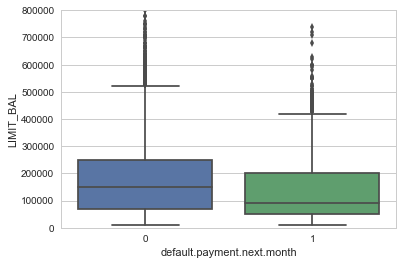

In [55]:
#Comparing customers who default or dont default regarding their credit limit
sns.set(style="whitegrid")
ax= sns.boxplot(x = default['default.payment.next.month'], y=default['LIMIT_BAL'])
ax.set(ylim=(0, 800000))

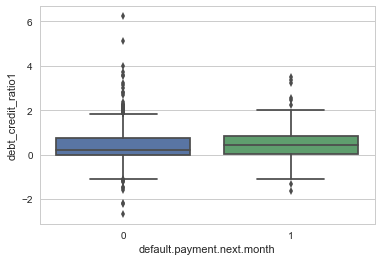

In [91]:
sns.set(style="whitegrid")
ax= sns.boxplot(x = default['default.payment.next.month'], y=default['debt_credit_ratio1'])
#ax.set(ylim=(-4, 4))

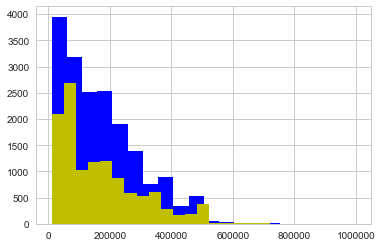

In [90]:
#comparing limit balance against for different sexes
male = default[(default['SEX'] == 1)]
female = default[(default['SEX'] == 2)]
plt.hist(female['LIMIT_BAL'], bins=20, color ='b')
plt.hist(male['LIMIT_BAL'], bins=20, color ='y')

plt.show()

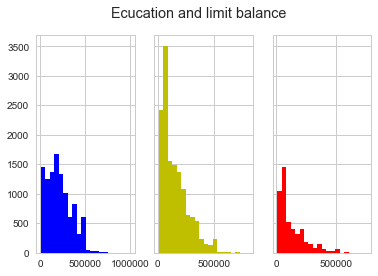

In [96]:
#comparing limit balance against for different sexes
graduate = default[(default['EDUCATION'] == 1)]
university = default[(default['EDUCATION'] == 2)]
high_school = default[(default['EDUCATION'] == 3)]
f, (ax1, ax2,ax3) = plt.subplots(1, 3, sharey=True)
f.suptitle('Ecucation and limit balance')
ax1.hist(graduate['LIMIT_BAL'], bins=20, color ='b')
ax2.hist(university['LIMIT_BAL'], bins=20, color ='y')
ax3.hist(high_school['LIMIT_BAL'], bins=20, color ='r')



plt.show()

In [32]:
#turning categorial age feature into a numerical feature
from sklearn import preprocessing

le = preprocessing.LabelEncoder()
le.fit(default['age'])

list(le.classes_)

default['age_']=le.transform(default['age']) 
default = default.drop(['age'], axis=1)


In [33]:
default.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,carrying_balance4,carrying_balance5,carrying_balance6,debt_credit_ratio1,debt_credit_ratio2,debt_credit_ratio3,debt_credit_ratio4,debt_credit_ratio5,debt_credit_ratio6,age_
0,1,20000.0,2,2,1,2,2,-1,-1,-2,...,0.0,0.0,0.0,0.195650,0.120650,0.034450,0.000000,0.000000,0.000000,0
1,2,120000.0,2,2,2,-1,2,0,0,0,...,2272.0,3455.0,1261.0,0.022350,0.006042,0.014017,0.018933,0.028792,0.010508,1
2,3,90000.0,2,2,2,0,0,0,0,0,...,13331.0,13948.0,10549.0,0.308011,0.139189,0.139544,0.148122,0.154978,0.117211,1
3,4,50000.0,2,2,1,0,0,0,0,0,...,27214.0,27890.0,28547.0,0.899800,0.924280,0.961820,0.544280,0.557800,0.570940,2
4,5,50000.0,1,2,1,-1,0,-1,0,0,...,11940.0,18457.0,18452.0,0.132340,-0.620220,0.516700,0.238800,0.369140,0.369040,3


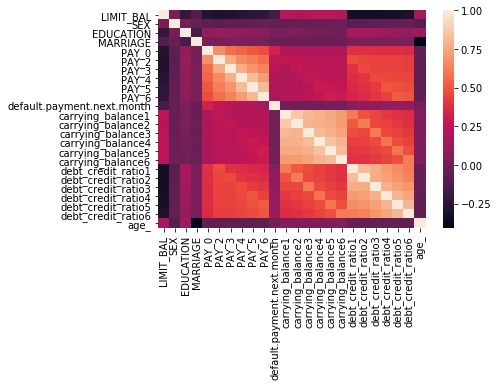

In [36]:

                
corr = default[['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'default.payment.next.month',
       'carrying_balance1', 'carrying_balance2', 'carrying_balance3',
       'carrying_balance4', 'carrying_balance5', 'carrying_balance6',
       'debt_credit_ratio1', 'debt_credit_ratio2', 'debt_credit_ratio3',
       'debt_credit_ratio4', 'debt_credit_ratio5', 'debt_credit_ratio6',
       'age_']].corr()
sns.heatmap(corr,xticklabels=corr.columns,yticklabels=corr.columns)
plt.show()

In [39]:
#creating feature and target arrays
target= default['default.payment.next.month']
features = default[['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6',
       'carrying_balance1', 'carrying_balance2', 'carrying_balance3',
       'carrying_balance4', 'carrying_balance5', 'carrying_balance6',
       'debt_credit_ratio1', 'debt_credit_ratio2', 'debt_credit_ratio3',
       'debt_credit_ratio4', 'debt_credit_ratio5', 'debt_credit_ratio6',
       'age_']]

In [40]:
X_train, X_test, y_train, y_test = train_test_split(features,target,test_size=0.3, shuffle=True)

Using XGboost

In [45]:
dtrain = xgb.DMatrix(data=X_train, label=y_train)
dtest = xgb.DMatrix(data=X_test, label=y_test)
params = {"objective":"binary:logistic", "max_depth":5}

cv_results = xgb.cv(dtrain=dtrain, params=params, nfold=5, num_boost_round=5, metrics="error", as_pandas=True, seed=123)

# Print cv_results
print(cv_results)

# Print the accuracy
print(((1-cv_results["test-error-mean"]).iloc[-1]))

/Users/armitasafavi/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


   train-error-mean  train-error-std  test-error-mean  test-error-std
0          0.172083         0.000125         0.182952        0.003766
1          0.170714         0.000223         0.179429        0.001265
2          0.170262         0.000825         0.179667        0.001576
3          0.169726         0.000575         0.178524        0.001080
4          0.169559         0.000591         0.177095        0.001720
0.8229048


In [51]:
watchlist = [(dtrain, 'train'), (dtest, 'eval')]
MAX_ROUNDS = 1000
model = xgb.train(params, 
                dtrain, 
                MAX_ROUNDS, 
                watchlist, 
                early_stopping_rounds=50, 
                maximize=True, 
                verbose_eval=50)

[0]	train-error:0.172381	eval-error:0.182778
Multiple eval metrics have been passed: 'eval-error' will be used for early stopping.

Will train until eval-error hasn't improved in 50 rounds.
[50]	train-error:0.155381	eval-error:0.183556
[100]	train-error:0.139333	eval-error:0.186222
[150]	train-error:0.122	eval-error:0.188
[200]	train-error:0.108905	eval-error:0.190444
[250]	train-error:0.096857	eval-error:0.195222
Stopping. Best iteration:
[247]	train-error:0.09781	eval-error:0.195667



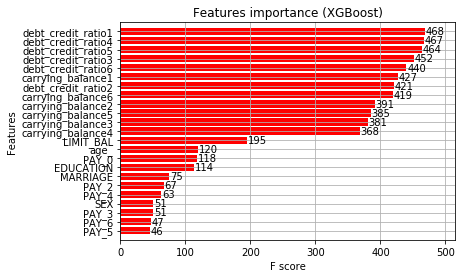

In [50]:
xgb.plot_importance(model, height=0.8, title="Features importance (XGBoost)", color="red") 
plt.show()